In [41]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import scipy.optimize
from scipy.stats import poisson, chi2, kstwobign
from scipy.stats import moment

import matplotlib.pyplot as plt
from visualisations import show_task

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [42]:
n = 100
columns = [i for i in range(0, 9+1)]
index = ["*.x*"]
data_df = pd.DataFrame(columns=columns, index = pd.Index(index))
data_df.loc["*.x*"] = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
data_df

,0,1,2,3,4,5,6,7,8,9
*.x*,5,8,6,12,14,18,11,6,13,7


In [43]:
# def delta_i(i: int, df: pd.DataFrame) -> float:
#     return 
p = 1/10 # Для равномерного распределения для дискретных значений
delta = 0
for i in range(0, 9+1): delta += (n*p - data_df.loc["*.x*", i])**2 / (n*p)
delta

16.4

In [44]:
sf = chi2.sf(delta, 10-1)
print(sf)

0.058984030544419454


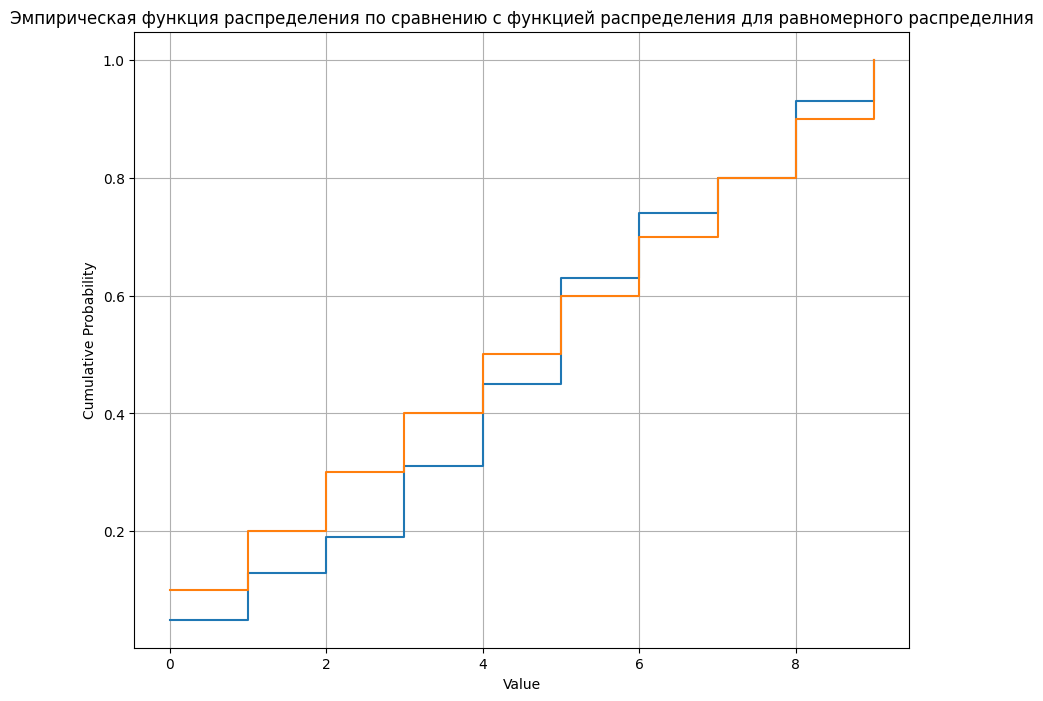

In [45]:
p_even = [i/10 for i in range(1, 10+1)]
p_empirical = [data_df.loc["*.x*", 0]/n]
for i in range(1, 9+1):
    p_empirical.append(p_empirical[i-1] + data_df.loc["*.x*", i]/n)


# Plotting
plt.step(columns, p_empirical, where='post')
plt.step(columns, p_even, where="post")
plt.title('Эмпирическая функция распределения по сравнению с функцией распределения для равномерного распределния')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [46]:
print(f"tp_even = \t{p_even}")
print(f"p_empirical = \t{p_empirical}")

tp_even = 	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_empirical = 	[0.05, 0.13, 0.19, 0.31, 0.45, 0.63, 0.74, 0.8, 0.93, 1.0]


In [47]:
delta = 0
delta = max(abs(p_even[0] - 0), abs(p_even[0] - p_empirical[0]))
for i in range(1, 9+1):
    delta = max(delta, abs(p_even[i] - p_empirical[i-1]), abs(p_even[i] - p_empirical[i]))
delta *= math.sqrt(n)
delta

2.1

In [48]:
kolmogorov_dist = kstwobign
sf_value = kolmogorov_dist.sf(delta)
print(f"P(K > {delta}) = {sf_value}")

P(K > 2.1) = 0.0002954967204631142
